In [1]:
# import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import sklearn
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow import keras

In [2]:
# define function to easily resize given images
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg") # file name to list, '*' for full text
    
    print(len(images), " images to be resized.")

    # reshaping all images to 28x28 and then saving each one of them
    target_size=(28, 28)
    for img in images:
        old_img=Image.open(img) # opening image
        new_img=old_img.resize(target_size,Image.ANTIALIAS) # resizing
        new_img.save(img, "JPEG") # saving image
    
    print(len(images), " images resized.")

# loading and resizing all images in scissor folder
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissors"
resize_images(image_dir_path)

# loading and resizing all images in rock folder
image_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/rock'
resize_images(image_dir_path)

# loading and resizing all images in rock folder
image_dir_path = os.getenv('HOME') + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

700  images to be resized.
700  images resized.
700  images to be resized.
700  images resized.
700  images to be resized.
700  images resized.


In [3]:
# function to load all train data
def load_data(img_path, number_of_data=2100):  # ensure to double check the num of data
    img_size=28
    color=3
    # assigning imgs with zero only matrix of total params
    # scissors : 0, rock : 1, paper : 2
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32) # image data into np.array
        imgs[idx,:,:,:]=img    # allocate img (array) to imgs index
        labels[idx]=0   # scissors : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # allocate img (array) to imgs index
        labels[idx]=1   # rock : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # allocate img (array) to imgs index
        labels[idx]=2   # paper : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train)) # check range of train data

학습데이터(x_train)의 이미지 개수는 2100 입니다.
x_train shape: (2100, 28, 28, 3)
y_train shape: (2100,)
최소값: 0  최대값: 255


라벨:  0


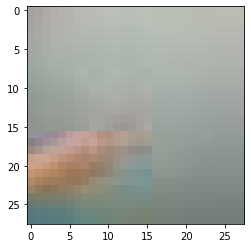

In [4]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [5]:
# normalizing train set
# x_train_norm = x_train / np.max(x_train) # divide by max num to normalize data
# print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
print('최소값:',np.min(x_test), ' 최대값:',np.max(x_test)) # check range of test data
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

최소값: 0  최대값: 255
(1680, 28, 28, 3) (420, 28, 28, 3) (1680,) (420,)


In [7]:
# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

In [8]:
# reshaping x_train_norm
# x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 3)
# x_train_reshaped.shape

In [9]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
53/53 [==============================] - 3s 4ms/step - loss: 4.1413 - accuracy: 0.3452
Epoch 2/20
53/53 [==============================] - 0s 3ms/step - loss: 1.1975 - accuracy: 0.3911
Epoch 3/20
53/53 [==============================] - 0s 3ms/step - loss: 1.0271 - accuracy: 0.4935
Epoch 4/20
53/53 [==============================] - 0s 3ms/step - loss: 0.9910 - accuracy: 0.5321
Epoch 5/20
53/53 [==============================] - 0s 3ms/step - loss: 0.8758 - accuracy: 0.6006
Epoch 6/20
53/53 [==============================] - 0s 3ms/step - loss: 0.8387 - accuracy: 0.6179
Epoch 7/20
53/53 [==============================] - 0s 3ms/step - loss: 0.8056 - accuracy: 0.6381
Epoch 8/20
53/53 [==============================] - 0s 3ms/step - loss: 0.7987 - accuracy: 0.6369
Epoch 9/20
53/53 [==============================] - 0s 3ms/step - loss: 0.7568 - accuracy: 0.6732
Epoch 10/20
53/53 [==============================] - 0s 3ms/step - loss: 0.7140 - accuracy: 0.6827
Epoch 11/20
53/53 [

In [10]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# Resize test images to 28x28
# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
# resize_images(image_dir_path)
# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
# resize_images(image_dir_path)
# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
# resize_images(image_dir_path)

# load data to test sets
# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
# (x_test, y_test)=load_data(image_dir_path)

In [11]:
# normalizing test set
# x_test_norm = x_test / np.max(x_test)   # normalize by dividing 217
# print('최소값:',np.min(x_test_norm), ' 최대값:',np.max(x_test_norm)) # after normalizing
# x_test_norm.shape

In [12]:
# reshaping test set
# x_test_reshaped = x_test_norm.reshape( -1, 28, 28, 3)

In [13]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

14/14 - 0s - loss: 0.6384 - accuracy: 0.7357
test_loss: 0.6384077072143555
test_accuracy: 0.7357142567634583


# 회고

